<a href="https://colab.research.google.com/github/sgevatschnaider/Grafos/blob/main/Cuando_el_Lenguaje_es_un_Imagen_Sinogramas_y_Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

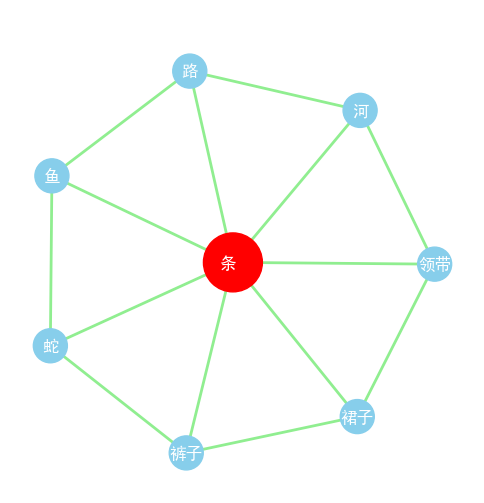

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML
import numpy as np
import networkx as nx

def animate_classifier_sinograms(save_path=None):
    """
    Crea un grafo rueda (wheel_graph) con un clasificador chino en el centro
    y varios sustantivos alrededor. Anima la rotación y el escalado de los nodos periféricos.

    Parámetros:
    -----------
    save_path : str o None
        Ruta de la carpeta donde se guardarán los archivos GIF y MP4.
        Si es None, no se guardan los archivos en disco.
    """

    # 1️⃣ Datos del clasificador y sus sustantivos
    clasificador = "条 "
    objetos = ["裤子", "裙子", "领带", "河", "路", "鱼", "蛇"]
    num_nodes = 1 + len(objetos)  # Centro + periferia

    # 2️⃣ Crear el grafo rueda
    #    Por defecto, wheel_graph(n) crea nodos [0..n-1], con 0 como centro.
    G = nx.wheel_graph(num_nodes)

    # 3️⃣ Renombrar nodos:
    #    - 0 -> clasificador
    #    - 1..n-1 -> sustantivos
    mapping = {0: clasificador}
    for i, obj in enumerate(objetos, start=1):
        mapping[i] = obj
    G = nx.relabel_nodes(G, mapping)

    # 4️⃣ Posiciones originales (sin transformar)
    #    - Clasificador en (0,0)
    #    - Sustantivos en un círculo de radio 1
    original_pos = {}
    original_pos[clasificador] = (0, 0)
    angle_step = 2 * np.pi / (num_nodes - 1)
    for i, obj in enumerate(objetos, start=1):
        angle = i * angle_step
        x = np.cos(angle)
        y = np.sin(angle)
        original_pos[obj] = (x, y)

    # 5️⃣ Crear la figura para la animación
    fig, ax = plt.subplots(figsize=(6, 6))

    # 6️⃣ Función de actualización de cada frame
    def update(frame):
        ax.clear()
        ax.set_facecolor((0.1, 0.1, 0.1))  # Fondo oscuro

        # Rotación y escalado
        rotation_angle = frame * np.pi / 50
        scaling_factor = 1 + 0.5 * np.sin(frame * np.pi / 100)

        transformed_pos = {}
        for node, (x0, y0) in original_pos.items():
            if node == clasificador:
                # El clasificador no rota ni escala (si lo deseas, cámbialo)
                transformed_pos[node] = (x0, y0)
            else:
                # Rotación en 2D
                x_rot = x0 * np.cos(rotation_angle) - y0 * np.sin(rotation_angle)
                y_rot = x0 * np.sin(rotation_angle) + y0 * np.cos(rotation_angle)
                # Escalado
                x_scl = x_rot * scaling_factor
                y_scl = y_rot * scaling_factor
                transformed_pos[node] = (x_scl, y_scl)

        # Dibujar nodos con tamaños distintos (más grande para el clasificador)
        node_sizes = []
        node_colors = []
        for node in G.nodes():
            if node == clasificador:
                node_sizes.append(1800)  # Tamaño mayor para el nodo central
                node_colors.append('red')
            else:
                node_sizes.append(600)
                node_colors.append('skyblue')

        nx.draw_networkx_nodes(
            G,
            transformed_pos,
            node_size=node_sizes,
            node_color=node_colors,
            ax=ax
        )

        # Dibujar etiquetas
        nx.draw_networkx_labels(
            G,
            transformed_pos,
            font_size=12,
            font_color='white',
            ax=ax
        )

        # Dibujar todas las aristas
        nx.draw_networkx_edges(
            G,
            transformed_pos,
            width=2,
            edge_color='lightgreen',
            ax=ax
        )

        ax.set_title("Animación: Clasificador (Centro) y Sustantivos (Rueda)", color='white')
        ax.axis('off')

    # 7️⃣ Crear la animación
    ani = animation.FuncAnimation(
        fig,
        update,
        frames=num_nodes + 50,
        interval=100,
        repeat=False
    )

    # 8️⃣ Guardar los archivos si se especifica 'save_path'
    if save_path is not None:
        if not os.path.exists(save_path):
            os.makedirs(save_path, exist_ok=True)

        # Guardar como GIF
        gif_filename = os.path.join(save_path, "sinogram_wheel.gif")
        ani.save(gif_filename, writer=PillowWriter(fps=10))

        # Guardar como MP4
        mp4_filename = os.path.join(save_path, "sinogram_wheel.mp4")
        ani.save(mp4_filename, writer="ffmpeg", fps=10)

    # 9️⃣ Retornar la animación para mostrarla en Jupyter
    return HTML(ani.to_jshtml())

# -------------------------
# EJECUCIÓN EN JUPYTER
# -------------------------

# Ruta local donde deseas guardar GIF y MP4
save_dir = r"C:\Users\Sergio\OneDrive\Documentos\universidad palermo\linkedin\sinogramas y grafos"

# Llamar a la función con la ruta de guardado
ani_html = animate_classifier_sinograms(save_path=save_dir)

# Mostrar la animación dentro de Jupyter
ani_html
